In [1]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
import gensim
from gensim.models.word2vec import LineSentence

In [12]:
import pandas as pd
df = pd.read_csv('./final_groupby_15.csv')
df.head(1)

,author,article,keywords
0,*GENISOFI*,因參加|會員活動|贏得升等套房住宿獎勵卷|適用於|系列所有飯店|艾美酒店|喜來登|福朋四季等...,"['官網', '飯店', '客房', '奇景', '含稅', '過會員', '早餐', '方..."


In [13]:
df['keywords']=df['keywords'].apply(lambda x:eval(x))

In [14]:
author_list = list(df['author'])
keywords_list =list(df['keywords'])

new_df = pd.DataFrame({'key_words':keywords_list}, index=author_list)
new_df = new_df['key_words'].apply(pd.Series)

In [15]:
new_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
*GENISOFI*,官網,飯店,客房,奇景,含稅,過會員,早餐,方式,有意者,事項,信討論,報價,會員,訂房,網路
000926,景色,公園,國光,歸途,媽祖廟,建築,親水,觀光,藝術品,熱水,年老,火車,腳踏車,門票,廟口
00愛哭又愛吃,空間,朋友,花草,旅店,房間,名產,友善,旅人,經驗,親切,不錯,人員,文章,雙人,方便
1234,壽司,美食,日本料理,食記,空間,感覺,雲品,早餐,舒適,酒店,飯店,粉色,游泳池,聚餐,中心
1313亮晶晶,五房,阡陌,房間,民宿,大片,所欲,草原,烤肉,空調,夜市,價錢,簡單,壯圍,天堂,房子
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
齊齊媽咪蚊子,會館,渡假,民宿,心田,房型,頂樓,早餐,中心,電話,時間,文章,陀螺,飯店,價格,客廳
龍包媽,連結,平台,訂房,專屬,飯店,網站,便利,帳號,旅館,地方,手機,時間,房間,運氣,壓力
Ｉｒｉｓ艾瑞絲,民宿,百合,房間,方便,空間,榻榻米,廁所,房型,樓梯,問題,日式,靜謐,離車,茶屋,熱情
Ｊ公主,姐妹,房間,排隊,優待票,觀景,酒吧,國際,民宿,罩衫,物品,購票,外觀,圖片,人文,證明


In [18]:
new_df.columns = ['w' for x in range(15)]
one_hot_df = pd.get_dummies(new_df)

In [19]:
one_hot_df

,w_一村,w_三義,w_上品,w_上師,w_下午茶,w_不柴,w_不祥,w_不錯,w_世界,w_业者,...,w_麋鹿,w_麒麟,w_麩質,w_麻油,w_麻煩,w_黃色,w_黑眼圈,w_黑色,w_鼻子,w_龍館
*GENISOFI*,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00愛哭又愛吃,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1313亮晶晶,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
齊齊媽咪蚊子,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
龍包媽,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ｉｒｉｓ艾瑞絲,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ｊ公主,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df=pd.DataFrame()
col_list = list(one_hot_df.columns)
for col_name in col_list:
    df[col_name.strip('w_')] = one_hot_df[[col_name]].sum(axis=1)
try:
    del new_df['Null']
    print('del Null')
except:
    pass
df = df.astype('float32')

/tmp/ipykernel_678/180173291.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name.strip('w_')] = one_hot_df[[col_name]].sum(axis=1)


In [21]:
df

,一村,三義,上品,上師,下午茶,不柴,不祥,不錯,世界,业者,...,驚恐,體積,體驗館,高尚,高效率,魔力,鳥林,麩質,黑眼圈,龍館
*GENISOFI*,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00愛哭又愛吃,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1313亮晶晶,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
齊齊媽咪蚊子,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
龍包媽,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ｉｒｉｓ艾瑞絲,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ｊ公主,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df = df.fillna('Null')

In [ ]:
a = ['早餐', '日式', '親子', '友善', '安靜']
b = buildWordVector(model, a , 50)
print(b)
# y4 = pd.DataFrame(y4, columns = ['kind-4'])

In [24]:
import numpy as np
import pandas as pd
from collections import Counter

from sklearn.cluster import KMeans
from sklearn import metrics, manifold
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Source Han Sans TW']
plt.rc('legend', fontsize=16)

In [98]:
nd_data = df.to_numpy()
# 降維
pca_data = PCA(n_components=2).fit_transform(nd_data)
# reduced_data  = manifold.TSNE(n_components=2,init="pca",random_state=0)\
#                         .fit_transform(nd_data)

In [55]:
pca_data[0]

array([ 0.12909748,  0.99571526,  0.16693778, -0.65249443, -0.20301308,
        0.3241092 , -0.5667962 ,  0.06336289], dtype=float32)

In [27]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

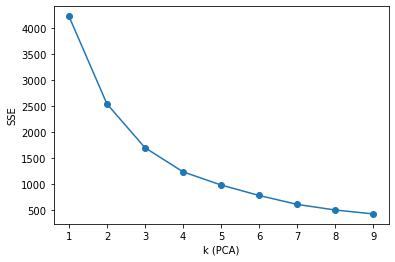

In [99]:
SSE =[]
for k in range(1,10):
    model_k = KMeans(n_clusters=k)
    model_k.fit(pca_data)
    SSE.append(model_k.inertia_)
X = range(1,10)
plt.xlabel('k (PCA)')  
plt.ylabel('SSE')  
plt.plot(X,SSE,'o-')  
plt.show()

In [94]:
#按5類分
kms5=KMeans(n_clusters=5)
y5=kms5.fit_predict(reduced_data)
# print(y5)
y5=pd.DataFrame(y5, columns = ['kind-5'])
# #按4類分
kms4=KMeans(n_clusters=4)
y4=kms4.fit_predict(reduced_data)
y4 = pd.DataFrame(y4, columns = ['kind-4'])
# 按3類分
kms3=KMeans(n_clusters=3)
y3=kms3.fit_predict(reduced_data)
y3 = pd.DataFrame(y3, columns = ['kind-3'])

In [95]:
from sklearn.metrics import silhouette_score
score_3 = silhouette_score(reduced_data, y3)
print("score = ",score_3)
score_4 = silhouette_score(reduced_data, y4)
print("score = ",score_4)
score_5 = silhouette_score(reduced_data, y5)
print("score = ",score_5)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score =  0.3902144


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score =  0.3828472


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score =  0.3957619


/tmp/ipykernel_678/4256779386.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-o" (-> color='r'). The keyword argument will take precedence.
  p_sil.plot(X, silho, 'r-o', color='tab:blue', alpha=0.75)
/tmp/ipykernel_678/4256779386.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-o" (-> color='r'). The keyword argument will take precedence.
  p_sse.plot(X, SSE, 'r-o', color='tab:red', alpha=0.75)


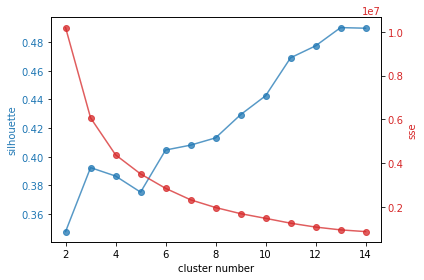

2 : 0.34769999980926514, 10189283
3 : 0.39239999651908875, 6063788
4 : 0.3865000009536743, 4373564
5 : 0.3752000033855438, 3502293
6 : 0.40470001101493835, 2843443
7 : 0.4081000089645386, 2319684
8 : 0.413100004196167, 1966379
9 : 0.4293000102043152, 1686678
10 : 0.4424999952316284, 1472231
11 : 0.4690999984741211, 1251012
12 : 0.477400004863739, 1073286
13 : 0.490200012922287, 945235
14 : 0.48969998955726624, 866573


In [60]:
# 創建模型 輸入資料 儲存數據
silho = []
SSE = []
X = range(2,15)
for k in X: # 群數
    kmeans = KMeans(n_clusters=k, random_state=0) # n_clusters=群數
    result = kmeans.fit(reduced_data)
    silho.append(metrics.silhouette_score(reduced_data, result.labels_))
    SSE.append(result.inertia_)

# 使用群數數據 折線圖
fig, p_sil = plt.subplots()
plt.xlabel('cluster number')
p_sse = p_sil.twinx()

# sil
p_sil.set_ylabel('silhouette', color='tab:blue')
p_sil.plot(X, silho, 'r-o', color='tab:blue', alpha=0.75)
p_sil.tick_params(axis='y', labelcolor='tab:blue')

p_sse.set_ylabel('sse', color='tab:red')
p_sse.plot(X, SSE, 'r-o', color='tab:red', alpha=0.75)
p_sse.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.show()

# 實際數值
for sil,sse,x in zip(silho, SSE, X):
    print(f'{x} : {round(sil,4)}, {int(sse)}') 

In [77]:
n_cluster = 4
kmeans = KMeans(n_clusters=n_cluster) # n_clusters=群數
result = kmeans.fit(reduced_data)

In [78]:
# 依據標籤分開數據
label_dict = dict()
label_name_dict = dict()
rl = result.labels_

for n in set(result.labels_): # create key標籤, value=nd.array(), shape=(0,2)
    label_dict[str(n)]=np.empty(shape=(0,2)) #
    label_name_dict[str(n)]=[]

# 依序把對應標籤的二維資料加入該群標籤的list中
for i in range(len(rl)):
    label_dict[str(rl[i])] = np.append(label_dict[str(rl[i])],[reduced_data[i]],axis=0)
    label_name_dict[str(rl[i])].append(list(df.index)[i])

In [79]:
# 儲存各群關鍵字
def words_label():
    label_word_dict = {}
    for i in label_name_dict:
        tmp = []
        for j in label_name_dict[i]:
            tmp += df.loc[j].tolist()
        while 'Null' in tmp:
            tmp.remove('Null')
        
        label_word_dict[i] = {}
        for x,y in Counter(tmp).most_common(30):
            label_word_dict[i][x]=y
    return label_word_dict

# 文字分群
label_word_dict = words_label()

/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 31859 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20818 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 35449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 23567 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 27138 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 22522 missing from current font.
  font.set_

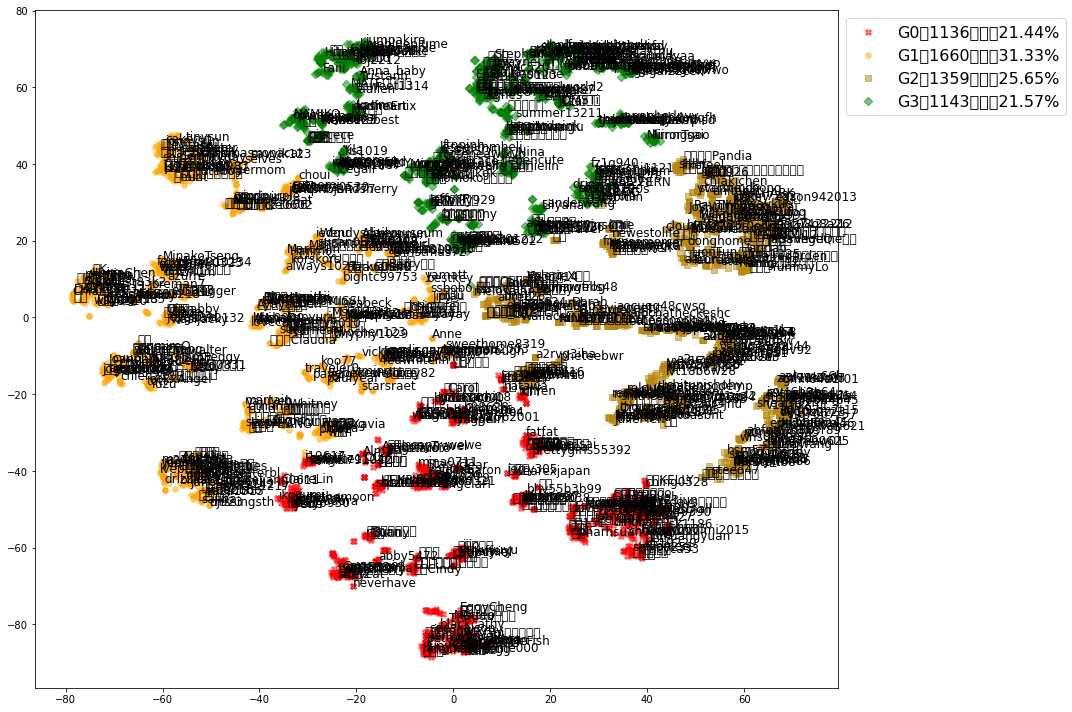

In [80]:
import random
# 繪製散點圖
plt.figure(figsize=(15,10))
alpha = 0.5 # 透明度
marker = 'x' # 點樣式
try:
    plt.scatter(label_dict['0'][:,0], label_dict['0'][:,1], alpha = alpha, color='red', marker='X', label = 'G{}，{}個，佔{}%'.format(0, len(label_dict['0']), round(len(label_dict['0'])/len(rl)*100,2)))
    plt.scatter(label_dict['1'][:,0], label_dict['1'][:,1], alpha = alpha, color='orange', marker='H', label = 'G{}，{}個，佔{}%'.format(1, len(label_dict['1']), round(len(label_dict['1'])/len(rl)*100,2)))
    plt.scatter(label_dict['2'][:,0], label_dict['2'][:,1], alpha = alpha, color='darkgoldenrod', marker='s', label = 'G{}，{}個，佔{}%'.format(2, len(label_dict['2']), round(len(label_dict['2'])/len(rl)*100,2)))
    plt.scatter(label_dict['3'][:,0], label_dict['3'][:,1], alpha = alpha, color='green', marker='D', label = 'G{}，{}個，佔{}%'.format(3, len(label_dict['3']), round(len(label_dict['3'])/len(rl)*100,2)))
    plt.scatter(label_dict['4'][:,0], label_dict['4'][:,1], alpha = alpha, color='dodgerblue', marker='^',label = 'G{}，{}個，佔{}%'.format(4, len(label_dict['4']), round(len(label_dict['4'])/len(rl)*100,2)))
    plt.scatter(label_dict['5'][:,0], label_dict['5'][:,1], alpha = alpha, color='darkblue', marker='<', label = 'G{}，{}個，佔{}%'.format(5, len(label_dict['5']), round(len(label_dict['5'])/len(rl)*100,2)))
    # plt.scatter(label_dict['6'][:,0], label_dict['6'][:,1], alpha = alpha, color='purple', marker='o', label = 'G{}，{}個，佔{}%'.format(6, len(label_dict['6']), round(len(label_dict['6'])/len(rl)*100,2)))
    # plt.scatter(label_dict['7'][:,0], label_dict['7'][:,1], alpha = alpha, color='fuchsia', marker='>', label = 'G{}，{}個，佔{}%'.format(7, len(label_dict['7']), round(len(label_dict['7'])/len(rl)*100,2)))
    # plt.scatter(label_dict['8'][:,0], label_dict['8'][:,1], alpha = alpha, color='yellow', marker='P', label = 'G{}，{}個，佔{}%'.format(8, len(label_dict['8']), round(len(label_dict['8'])/len(rl)*100,2)))
    # plt.scatter(label_dict['9'][:,0], label_dict['9'][:,1], alpha = alpha, color='purple', marker='o', label = 'G{}，{}個，佔{}%'.format(6, len(label_dict['9']), round(len(label_dict['9'])/len(rl)*100,2)))
    # plt.scatter(label_dict['10'][:,0], label_dict['10'][:,1], alpha = alpha, color='fuchsia', marker='>', label = 'G{}，{}個，佔{}%'.format(7, len(label_dict['10']), round(len(label_dict['10'])/len(rl)*100,2)))
except:
    pass

for x in label_dict:
    random_pick = random.sample(range(len(label_name_dict[x])), len(label_name_dict[x])//5)
    for i in random_pick:
        plt.annotate(label_name_dict[x][i], xy = (label_dict[x][i,0], label_dict[x][i,1]),
                     xytext = (label_dict[x][i,0]+0.001,label_dict[x][i,1]+0.001), fontsize=12)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.tight_layout()
plt.show()